In [146]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import ticker

from mpl_toolkits.axes_grid1 import ImageGrid
def argmaxmulti(a):
    ind = np.unravel_index(np.argmax(a, axis=None), a.shape)
    return ind

num_lines=15
# matplotlib 2
#mpl.rcParams['axes.color_cycle'] = [plt.cm.Spectral(i) for i in np.linspace(0, 1, 15)]
# matplotlib 3
from cycler import cycler
#plt.rc('axes', prop_cycle=(cycler('color', [plt.cm.brg(i) for i in np.linspace(0, 1, 15)]))) 
plt.rc('axes', prop_cycle=(cycler('color', [plt.cm.rainbow(i) for i in np.linspace(0, 1, 15)]))) 
from scipy.io import loadmat # because some of Sara's files are done by MATLAB

In [143]:
#measurent_wl_nm_file = '/u/46/necadam1/unix/project/SaraRect/measurement/measurement_wavelengths_nm'
measurent_wl_nm_file = '/home/mmn/SaraRect/measurement/measurement_wavelengths_nm'
meas_wl_nm = np.loadtxt(measurent_wl_nm_file)
#datafiles = ['/m/phys/project/qd/Marek/SaraRect/measurement/380x375_PD']
datafiles = ['/home/mmn/SaraRect/measurement/380x375_PD']
#prefix = '/u/46/necadam1/unix/project/SaraRect/measurement/'
prefix = '/home/mmn/SaraRect/measurement/'
infices = [ '380x370-0pol-_PD',
            '380x370-90pol-_PD',
            '380x370_PD',
            '380x375-0pol-_PD',
            '380x375-90pol-_PD',
            '380x375_PD',
            '380x380-0pol-_PD',
            '380x380-90pol-_PD',
            '380x380_PD',
            '380x385-0pol-_PD',
            '380x385-90pol-_PD',
            '380x385_PD',
            '380x390-0pol-_PD',
            '380x390-90pol-_PD',
            '380x390_PD',
           ]

colormapfile='/home/mmn/SaraRect/custom_coldWarm.mat'

intensityfile = '14'

postfix = '/%s.csv' % intensityfile
           
peakslices = [
    [740,770],
    [765,785],
    [795,820],
    [825,850], # off
    [850,875], # off
]

dimension_labels = ['$380\\,\\mathrm{nm}\\times 370\\,\\mathrm{nm}$',
                   '$380\\,\\mathrm{nm}\\times 375\\,\\mathrm{nm}$',
                   '$380\\,\\mathrm{nm}\\times 380\\,\\mathrm{nm}$',
                   '$380\\,\\mathrm{nm}\\times 385\\,\\mathrm{nm}$',
                   '$380\\,\\mathrm{nm}\\times 390\\,\\mathrm{nm}$',
]


pyarrow_lambdas_nm = 1.52 * np.array([370,375,380,385,390])

fs35=(14,7) 

thecmarray=loadmat(colormapfile)['custom_coldWarm']
#thecm = mpl.colors.ListedColormap(thecmarray, name='custom_coldWarm', N=None)
thecm='gnuplot2'

In [59]:
#Data preload


alldata = list()

for i, infix in enumerate(infices):
    poldata = list()
    for varintens in range(1,16):
        varpostfix = '/%02d.csv' % varintens
        datapath = prefix+infix+varpostfix
        data = np.loadtxt(datapath)
        poldata.append(data)
    alldata.append(poldata)
    
    

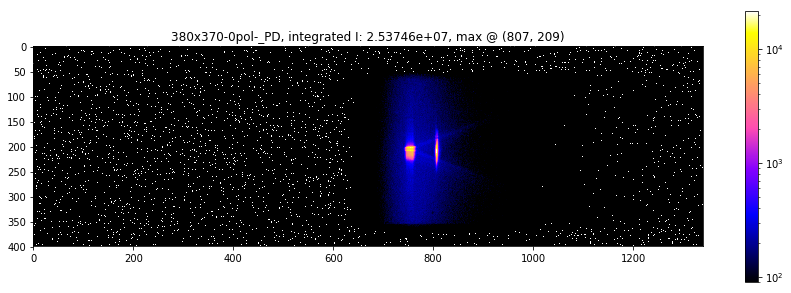

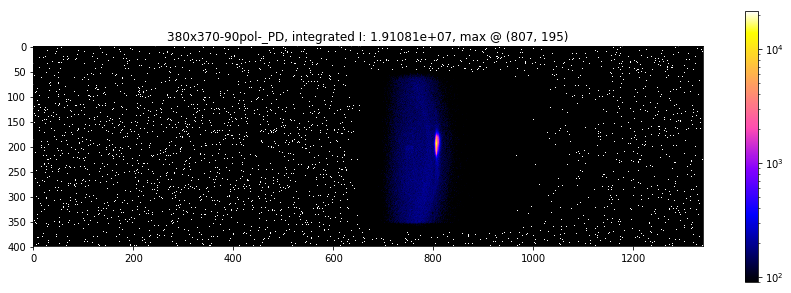

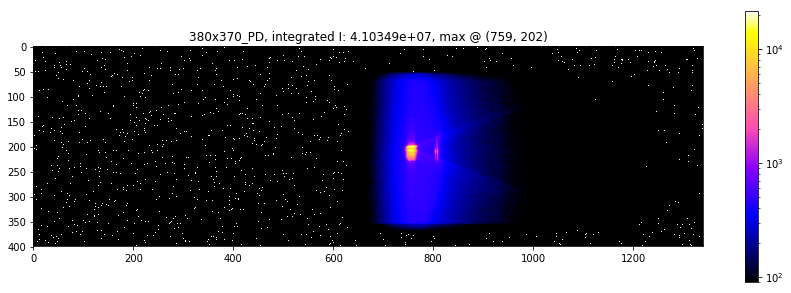

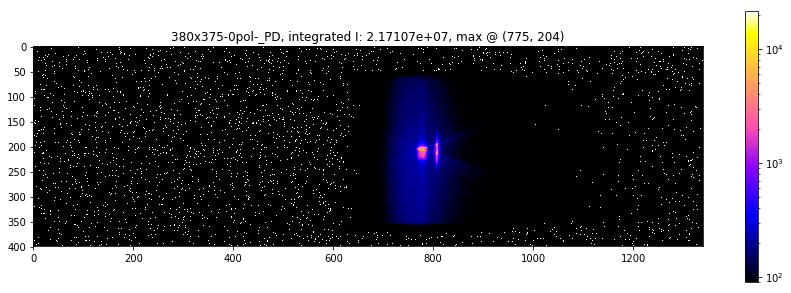

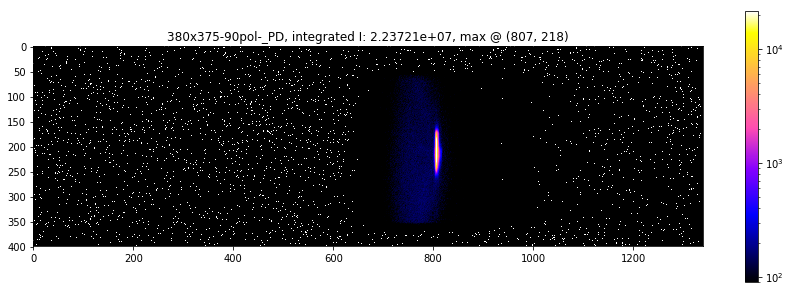

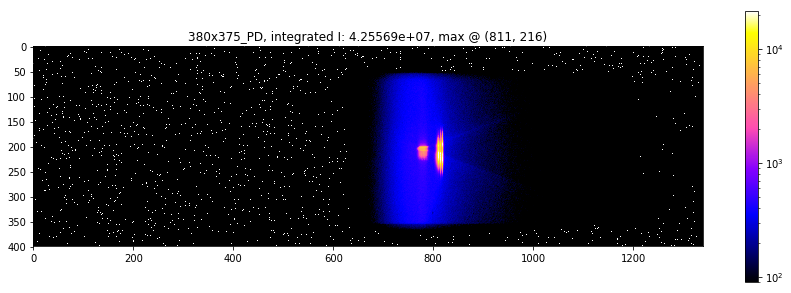

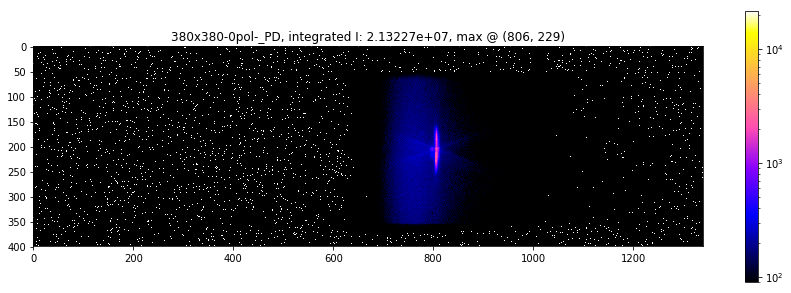

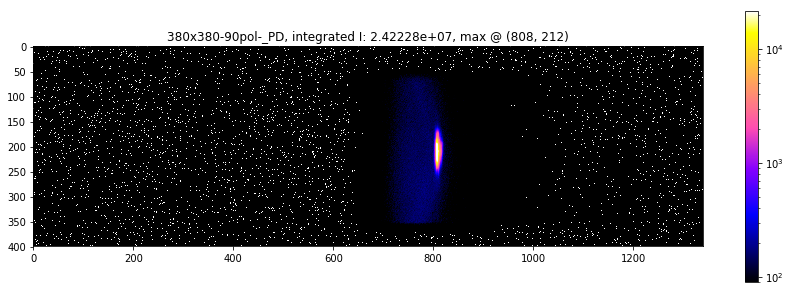

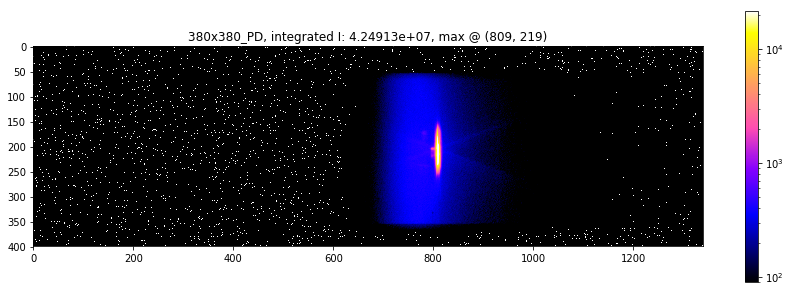

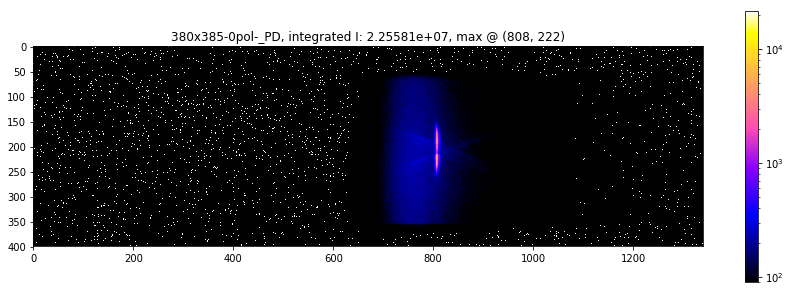

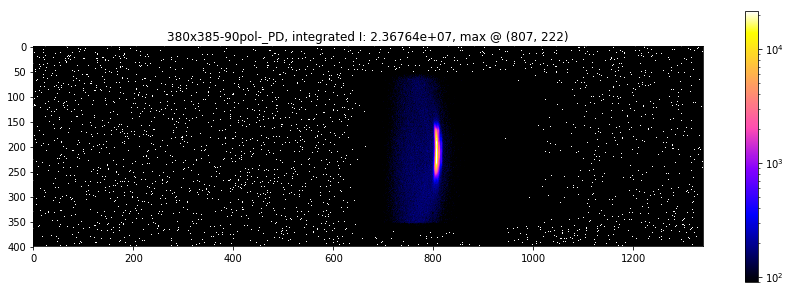

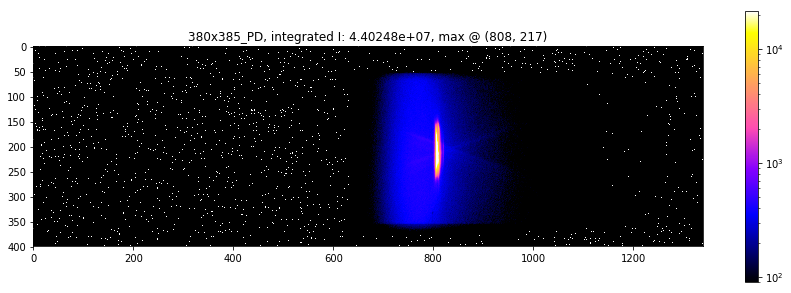

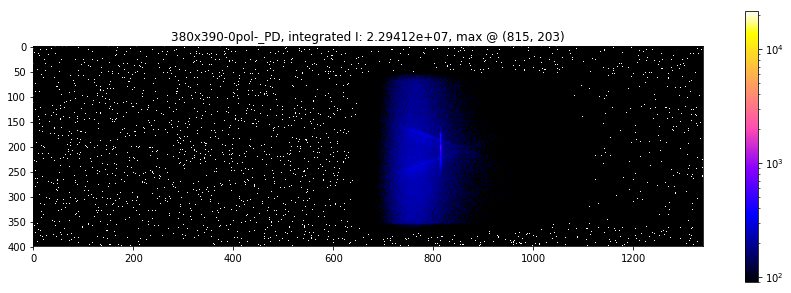

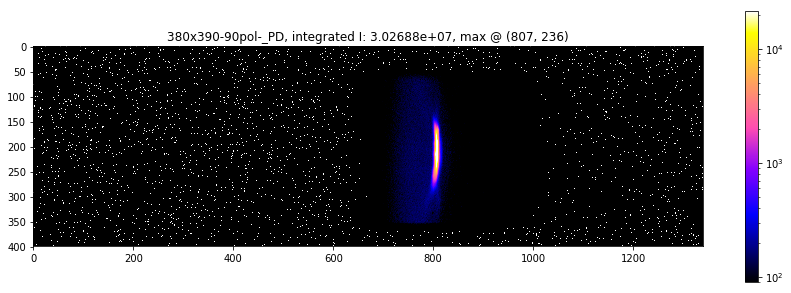

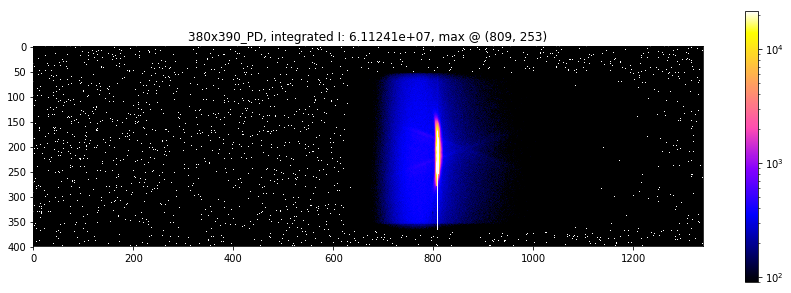

In [100]:
experiment_cbnorm = mpl.colors.LogNorm(vmin=90#50
                                              , clip=True)

for i, infix in enumerate(infices):
    datapath = prefix+infix+postfix
    data = np.loadtxt(datapath)
    f, ax = plt.subplots(1, figsize=(15,5))
    #ax = axes[i]
    im = ax.imshow(data.T, cmap=thecm, norm=experiment_cbnorm)
    f.colorbar(im)
    ax.set_title("%s, integrated I: %g, max @ %s" % (infix, np.sum(data), str(argmaxmulti(data))))

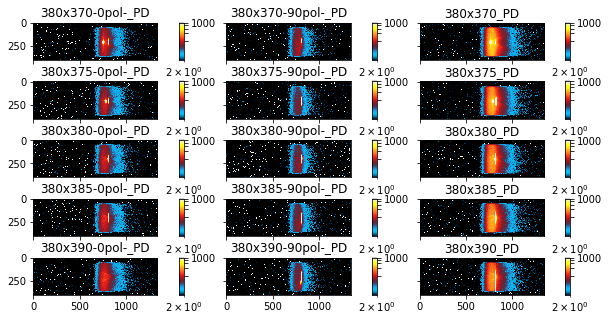

In [93]:
f = f = plt.figure(1, fs35)
experiment_cbnorm = mpl.colors.LogNorm(vmin=40#50
                                              , clip=True)
axes = ImageGrid(#cf. https://matplotlib.org/tutorials/toolkits/axes_grid.html
                 f, 111,  # similar to subplot(111)
                 nrows_ncols=(5, 3),  # creates 5x2 grid of axes
                 axes_pad=0.3,  # pad between axes in inch.
                 aspect=False,
                 share_all=True,
                 cbar_mode='each',
                 cbar_location="right",
                 cbar_size = "3 %",
                 cbar_pad = 0
                 )
for i, infix in enumerate(infices):
    datapath = prefix+infix+postfix
    data = np.loadtxt(datapath)
    #f, ax = plt.subplots(1, figsize=(15,5))
    ax = axes[i]
    im = ax.imshow(np.clip((data.T), 0, 1000), cmap=thecm, norm=experiment_cbnorm)
    cb = ax.cax.colorbar(im)
    #f.colorbar(im)
    ax.set_title(infix)
#f.savefig("figs/rawdata_clipped_1000.pdf")
f.savefig("figs/rawdata_unclipped.pdf")

In [101]:
alldata = list()

for i, infix in enumerate(infices):
    poldata = list()
    for varintens in range(1,16):
        varpostfix = '/%02d.csv' % varintens
        datapath = prefix+infix+varpostfix
        data = np.loadtxt(datapath)
        poldata.append(data)
    alldata.append(poldata)

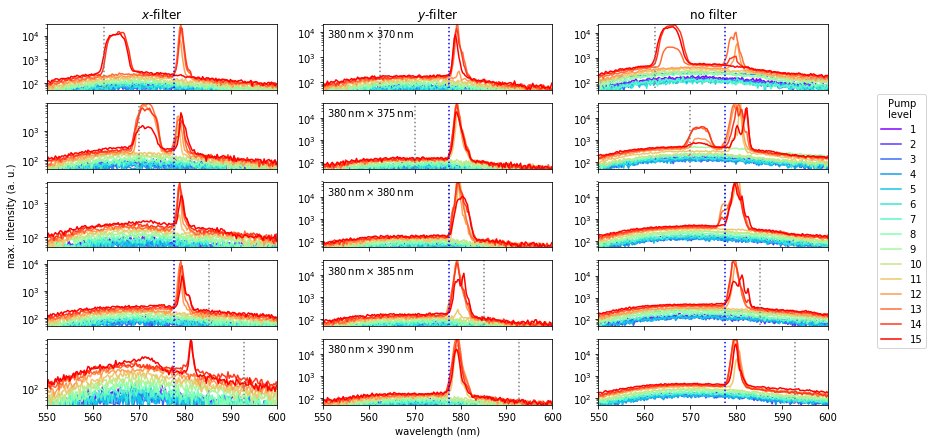

In [148]:
f, axes = plt.subplots(5,3, figsize=fs35, sharex='all')
for i, infix in enumerate(infices):
    ax = axes[i//3, i%3]
    ax.set_xlim(550,600)
    handles= list()
    for varintens in range(0,15):
        data = alldata[i][varintens]
        am = argmaxmulti(data)
        im, = ax.plot(meas_wl_nm, data[:,am[1]], label='%d'%varintens)
        handles.append(im)
    ax.set_ylim([50,None])
    ax.set_yscale('log')
    #ax.arrow(pyarrow_lambdas_nm[i//3], yrange_invum[0], 0, (yrange_invum[0]-yrange_invum[1])*.08, head_starts_at_zero=True, width=0.01, clip_on=False, color='r')
    ax.axvline(x=pyarrow_lambdas_nm[i//3], ymin=-0.1, ymax=1.1, color='grey', ls=':')
    ax.axvline(x=pyarrow_lambdas_nm[2], ymin=-0.1, ymax=1.1, color='blue', ls=':')

    #ax.set_title(infix)
    if i % 3 == 1:
        ax.text(0.02, 0.95,dimension_labels[i//3], ha='left', va='top', transform=ax.transAxes)
axes[0,0].set_title('$x$-filter')
axes[0,1].set_title('$y$-filter')
axes[0,2].set_title('no filter')
axes[4,1].set_xlabel('wavelength (nm)')
axes[2,0].set_ylabel('max. intensity (a. u.)')
f.legend(handles=handles, labels=['%d' % i for i in range(1, 16)], title = '''Pump
level''', loc='right')
#f.savefig("figs/rawdata_clipped_1000.pdf")
f.savefig("figs/k0crosscuts_at_max.pdf")

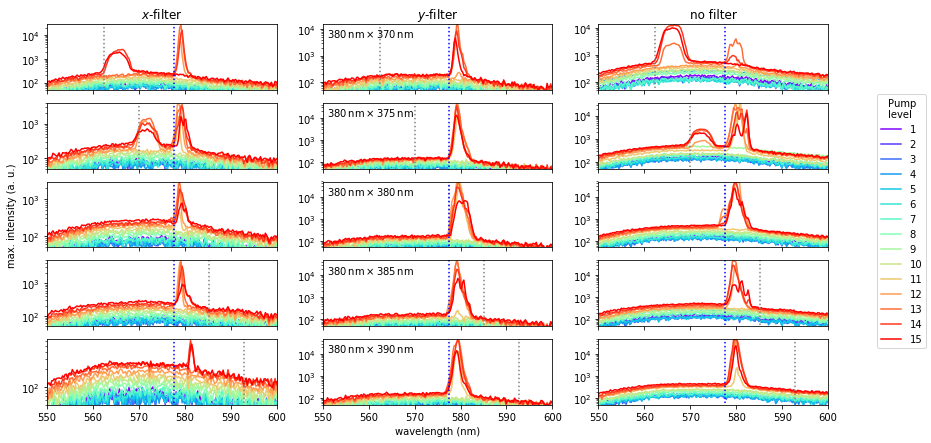

In [149]:
f, axes = plt.subplots(5,3, figsize=fs35, sharex='all')
for i, infix in enumerate(infices):
    ax = axes[i//3, i%3]
    ax.set_xlim(550,600)
    #ax.set_xlim(700,900)
    handles= list()
    for varintens in range(0,15):
        data = alldata[i][varintens]
        am = argmaxmulti(data)
        im, = ax.plot(meas_wl_nm, 
                      data[:,200], label='%d'%varintens)
        handles.append(im)
    ax.set_ylim([50,None])
    ax.set_yscale('log')
    #ax.set_title(infix)
    if i % 3 == 1:
        ax.text(0.02, 0.95,dimension_labels[i//3], ha='left', va='top', transform=ax.transAxes)
    ax.axvline(x=pyarrow_lambdas_nm[i//3], ymin=-0.1, ymax=1.1, color='grey', ls=':')
    ax.axvline(x=pyarrow_lambdas_nm[2], ymin=-0.1, ymax=1.1, color='blue', ls=':')
axes[0,0].set_title('$x$-filter')
axes[0,1].set_title('$y$-filter')
axes[0,2].set_title('no filter')
axes[4,1].set_xlabel('wavelength (nm)')
axes[2,0].set_ylabel('max. intensity (a. u.)')
f.legend(handles=handles, labels=['%d' % i for i in range(1, 16)], title = '''Pump
level''', loc='right')
#f.savefig("figs/rawdata_clipped_1000.pdf")
f.savefig("figs/k0crosscuts_at_200.pdf")

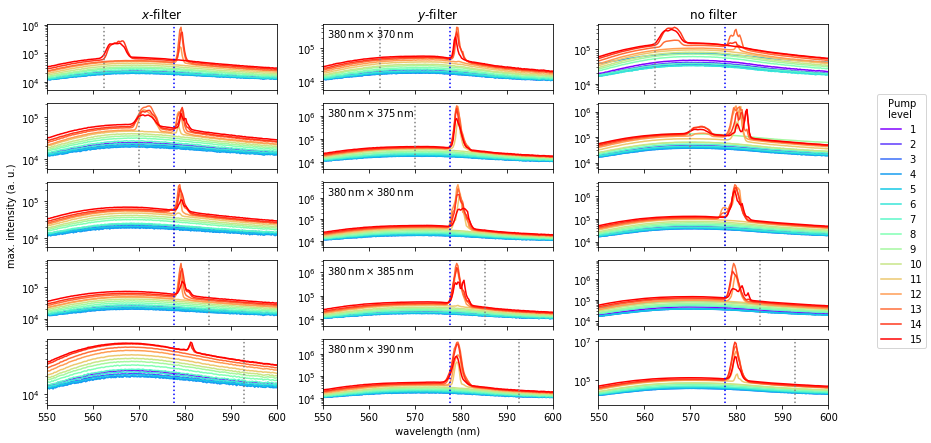

In [150]:
f, axes = plt.subplots(5,3, figsize=fs35, sharex='all')
for i, infix in enumerate(infices):
    ax = axes[i//3, i%3]
    ax.set_xlim(550,600)
    handles= list()
    for varintens in range(0,15):
        data = alldata[i][varintens]
        am = argmaxmulti(data)
        im, = ax.plot(meas_wl_nm, np.sum(data, axis=1), label='%d'%varintens)
        handles.append(im)
    #ax.set_ylim([None,None])
    ax.set_yscale('log')
    #ax.set_title(infix)
    if i % 3 == 1:
        ax.text(0.02, 0.95,dimension_labels[i//3], ha='left', va='top', transform=ax.transAxes)
    ax.axvline(x=pyarrow_lambdas_nm[i//3], ymin=-0.1, ymax=1.1, color='grey', ls=':')
    ax.axvline(x=pyarrow_lambdas_nm[2], ymin=-0.1, ymax=1.1, color='blue', ls=':')
axes[0,0].set_title('$x$-filter')
axes[0,1].set_title('$y$-filter')
axes[0,2].set_title('no filter')
axes[4,1].set_xlabel('wavelength (nm)')
axes[2,0].set_ylabel('max. intensity (a. u.)')
f.legend(handles=handles, labels=['%d' % i for i in range(1, 16)], title = '''Pump
level''', loc='right')
#f.savefig("figs/rawdata_clipped_1000.pdf")
f.savefig("figs/sumints.pdf")

In [139]:
plt.rc('axes', prop_cycle=(cycler('color', ['#1F77B4AA', '#FF7F0EAA', '#2CA02C', '#D62728', '#9467BD', '#8C564B', '#CFECF9', '#7F7F7F', '#BCBD22', '#17BECF']))) 

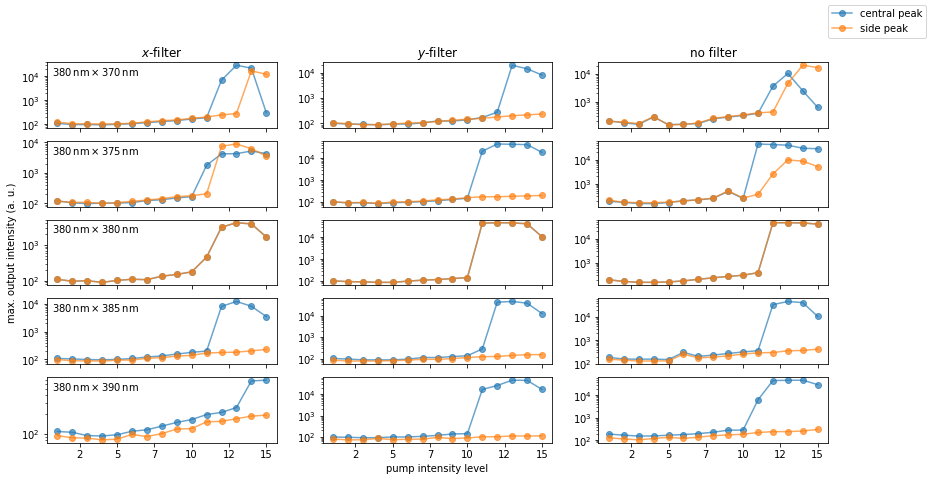

In [140]:
f, axes = plt.subplots(5,3, figsize=fs35, sharex='all')
for i, infix in enumerate(infices):
    irow = i//3
    icol = i%3
    ax = axes[irow, icol]
    #ax.set_xlim(550,600)
    centralmaxima = list()
    sidemaxima = list()
    for varintens in range(0,15):
        data = alldata[i][varintens]
        centralmaxima.append(np.amax(data[peakslices[2][0]:peakslices[2][1],:]))
        sidemaxima.append(np.amax(data[peakslices[irow][0]:peakslices[irow][1],:]))
    handle1, = ax.plot([i for i in range(1,16)], centralmaxima, marker='o', label='central peak')
    handle2, = ax.plot([i for i in range(1,16)],sidemaxima, marker='o', label='side peak')
    #ax.set_ylim([None,None])
    ax.set_yscale('log')
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%d"))
    #ax.set_title(infix)
    #ax.set_prop_cycle(cycler('color', ['1F77B4', 'FF7F0E', '2CA02C', 'D62728', '9467BD', '8C564B', 'CFECF9', '7F7F7F', 'BCBD22', '17BECF']))
    if i % 3 == 0:
        ax.text(0.02, 0.95,dimension_labels[i//3], ha='left', va='top', transform=ax.transAxes)
axes[0,0].set_title('$x$-filter')
axes[0,1].set_title('$y$-filter')
axes[0,2].set_title('no filter')
axes[4,1].set_xlabel('pump intensity level')
axes[2,0].set_ylabel('max. output intensity (a. u.)')
f.legend(handles=[handle1, handle2],loc='upper right')
#f.savefig("figs/rawdata_clipped_1000.pdf")
f.savefig("figs/peaks_max.pdf")

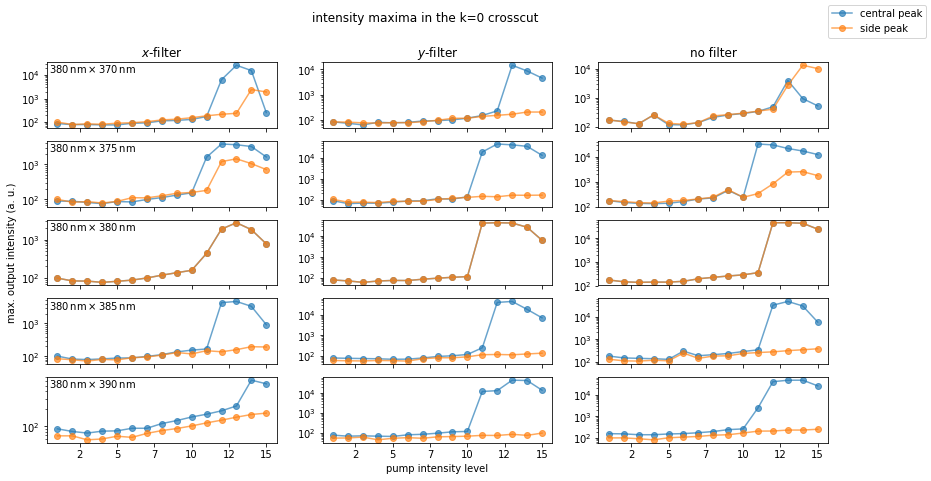

In [141]:
f, axes = plt.subplots(5,3, figsize=fs35, sharex='all')
for i, infix in enumerate(infices):
    irow = i//3
    icol = i%3
    ax = axes[irow, icol]
    #ax.set_xlim(550,600)
    centralmaxima = list()
    sidemaxima = list()
    for varintens in range(0,15):
        data = alldata[i][varintens]
        centralmaxima.append(np.amax(data[peakslices[2][0]:peakslices[2][1],200]))
        sidemaxima.append(np.amax(data[peakslices[irow][0]:peakslices[irow][1],200]))
    handle1, = ax.plot([i for i in range(1,16)], centralmaxima, marker='o', label='central peak')
    handle2, = ax.plot([i for i in range(1,16)],sidemaxima, marker='o', label='side peak')
    #ax.set_ylim([None,None])
    ax.set_yscale('log')
    #ax.set_title(infix)
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%d"))
    if i % 3 == 0:
        ax.text(0.01, 0.99,dimension_labels[i//3], ha='left', va='top', transform=ax.transAxes)
axes[0,0].set_title('$x$-filter')
axes[0,1].set_title('$y$-filter')
axes[0,2].set_title('no filter')
axes[4,1].set_xlabel('pump intensity level')
axes[2,0].set_ylabel('max. output intensity (a. u.)')
f.suptitle('intensity maxima in the k=0 crosscut')
f.legend(handles=[handle1, handle2],loc='upper right')
#f.savefig("figs/rawdata_clipped_1000.pdf")
f.savefig("figs/peaks_k0.pdf")

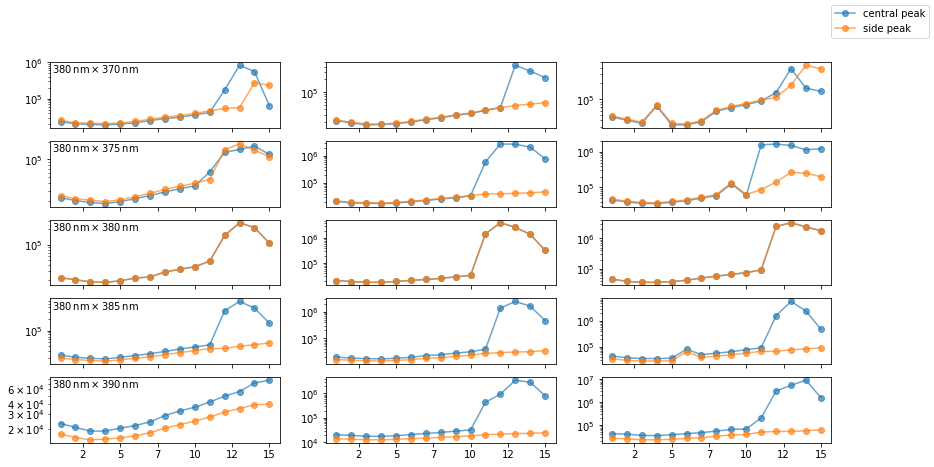

In [142]:
f, axes = plt.subplots(5,3, figsize=fs35, sharex='all')
for i, infix in enumerate(infices):
    irow = i//3
    icol = i%3
    ax = axes[irow, icol]
    #ax.set_xlim(550,600)
    centralmaxima = list()
    sidemaxima = list()
    for varintens in range(0,15):
        data = alldata[i][varintens]
        centralmaxima.append(np.amax(np.sum(data[peakslices[2][0]:peakslices[2][1],:], axis=1)))
        sidemaxima.append(np.amax(np.sum(data[peakslices[irow][0]:peakslices[irow][1],:], axis=1)))
    handle1, = ax.plot([i for i in range(1,16)], centralmaxima, marker='o', label='central peak')
    handle2, = ax.plot([i for i in range(1,16)],sidemaxima, marker='o', label='side peak')
    #ax.set_ylim([None,None])
    ax.set_yscale('log')
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%d"))
    #ax.set_title(infix)
    if i % 3 == 0:
        ax.text(0.01, 0.99,dimension_labels[i//3], ha='left', va='top', transform=ax.transAxes)
f.legend(handles=[handle1, handle2],loc='upper right')
#f.savefig("figs/rawdata_clipped_1000.pdf")
f.savefig("figs/peaks_summed.pdf")

In [70]:
suffices2 = ['mag_Ni10b-0150BLZ550nmHSLNG2.ods',                                                                                                                                                                                                                                            
'mag_Ni6b-0150BLZ550nmHSLNG2.ods',                                                                                                                                                                                                                                             
'mag_Ni7b-0150BLZ550nmHSLNG2.ods',                                                                                                                                                                                                                                             
'mag_Ni8b-0150BLZ550nmHSLNG2.ods',                                                                                                                                                                                                                                             
'mag_Ni8b-1-0150BLZ550nmHSLNG2.ods',                                                                                                                                                                                                                                           
'mag_Ni9b-0150BLZ550nmHSLNG2.ods',                                                                                                                                                                                                                                             
'ND1mag_Ni10b-90pol-0150BLZ550nmHSLNG2.ods',                                                                                                                                                                                                                                   
'ND1mag_Ni10b-pol-0150BLZ550nmHSLNG2.ods',                                                                                                                                                                                                                                     
'ND1mag_Ni6b-90pol-0150BLZ550nmHSLNG2.ods',                                                                                                                                                                                                                                    
'ND1mag_Ni6b-pol-0150BLZ550nmHSLNG2.ods',                                                                                                                                                                                                                                      
'ND1mag_Ni7b-90pol-0150BLZ550nmHSLNG2.ods',                                                                                                                                                                                                                                    
'ND1mag_Ni7b-pol-0150BLZ550nmHSLNG2.ods',                                                                                                                                                                                                                                      
'ND1mag_Ni8b-20150BLZ550nmHSLNG2.ods',                                                                                                                                                                                                                                         
'ND1mag_Ni8b-90pol-0150BLZ550nmHSLNG2.ods',                                                                                                                                                                                                                                    
'ND1mag_Ni8b-90pol-1-0150BLZ550nmHSLNG2.ods',                                                                                                                                                                                                                                  
'ND1mag_Ni8b-90pol-20150BLZ550nmHSLNG2.ods',
'ND1mag_Ni8b-pol-0150BLZ550nmHSLNG2.ods',
'ND1mag_Ni8b-pol-20150BLZ550nmHSLNG2.ods',
'ND1mag_Ni9b-90pol-0150BLZ550nmHSLNG2.ods',
'ND1mag_Ni9b-pol-0150BLZ550nmHSLNG2.ods',
]
    


In [ ]:
for suffix in suffices2:
    datapath = prefix+suffix
    data = np.loadtxt(datapath)
    #print(data.shape)
    f, ax = plt.subplots(1)
    ax.plot(np.log(data))
    ax.set_title(suffix)

In [83]:
thecmarray.shape

(342, 3)

In [82]:
thecmarray=loadmat(colormapfile)['custom_coldWarm']
thecm = mpl.colors.ListedColormap(thecmarray, name='custom_coldWarm', N=None)